In [2]:
import pandas as pd
import sys, os

# Import the path prefix from the parent directory
# Get the current notebook's directory
notebook_dir = os.path.dirname(os.path.abspath(''))

# Add the parent directory to sys.path
sys.path.append(notebook_dir)

# Now we can import PATH_PREFIX
from path_prefix import PATH_PREFIX


In [3]:
# Read the to and la files
to_df = pd.read_csv(PATH_PREFIX + '/data/wp/sample.to.csv')
la_df = pd.read_csv(PATH_PREFIX + '/data/wp/sample.la.csv')

to_df.head()

,id,time,airport,lat,lon,error
0,SWA2173 ac00d6,1.653264e+09,KPHX,33.4343,-112.0120,0.025168
1,AAL1179 a3c9c5,1.653264e+09,KORD,41.9786,-87.9047,0.052103
2,SKW6266 a65d06,1.653264e+09,KDWH,30.0618,-95.5528,0.068820
3,DAL1208 a418b2,1.653264e+09,KMSP,44.8820,-93.2218,0.026757
4,ASA1431 ad8b1d,1.653264e+09,KBOS,42.3643,-71.0052,0.143910


In [5]:
all_df = pd.concat([to_df, la_df], ignore_index=True)
# Get the unique airports
arpts = all_df['airport'].unique()
print('Found {} airports'.format(len(arpts)))

Found 134 airports


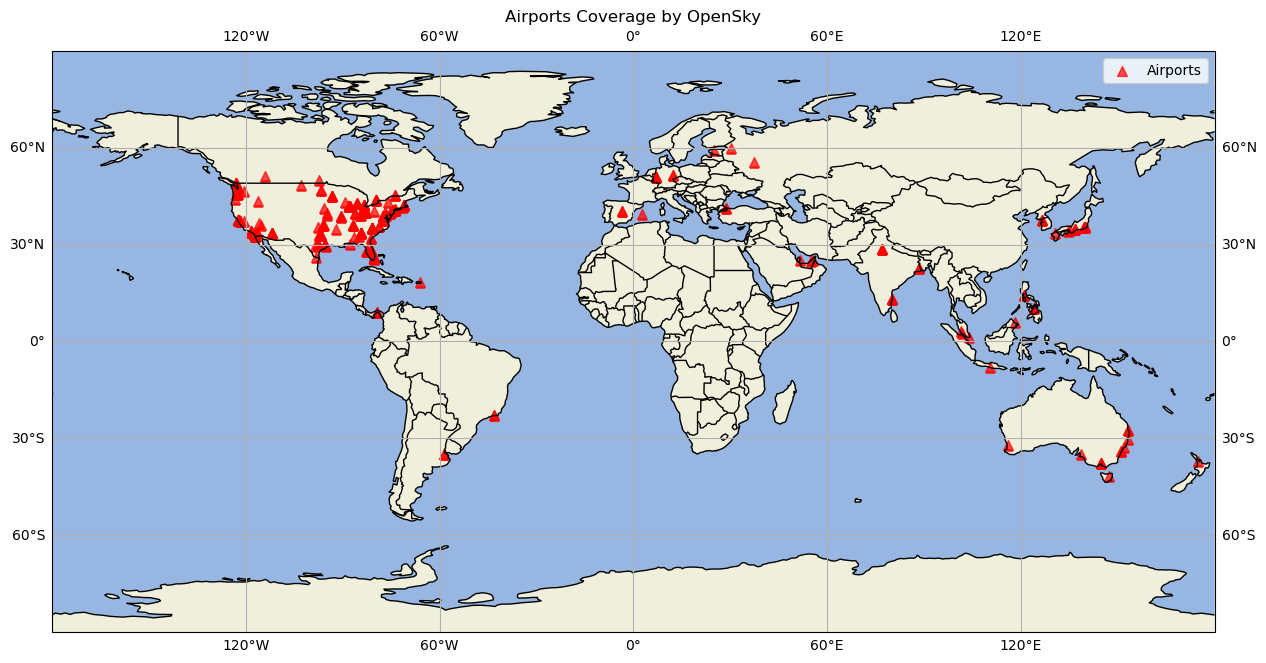

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure and axis with a map projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)


# Plot the airports
ax.scatter(all_df['lon'], all_df['lat'], transform=ccrs.PlateCarree(), 
           color='red', marker='^', s=50, alpha=0.7, label='Airports')

# Set the map extent to focus on the data
ax.set_global()

# Add gridlines
ax.gridlines(draw_labels=True)

# Add a title and legend
plt.title('Airports Coverage by OpenSky')
plt.legend()

# Show the plot
plt.savefig('all_airports.png', dpi=300)
